In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

# Data preprocessing

In [2]:
data = pd.read_csv("COMPLETE_DATA.csv",sep=";", decimal='.') #import dataset
data.head() #Visualize first 5 rows of dataset

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.0004,-0.0002,3.0,0,0.0066,1.6712,0.0001,2.0400,0.7129,0.3687
1,ND3X0.2,-0.0004,0.5391,3.0,0,0.0063,1.6898,0.0004,2.0409,0.7129,0.3511
2,ND3X0.4,-0.0004,1.0784,3.0,0,0.0057,1.7185,0.0004,2.0314,0.7090,0.3129
3,ND3X0.6,-0.0004,1.6178,3.0,0,0.0049,1.7692,0.0000,2.0348,0.7142,0.2656
4,ND3X0.8,-0.0004,2.1571,3.0,0,0.0041,1.8047,0.0000,2.0267,0.7106,0.2220


In [3]:
data.shape #visualize dataset dimensions

(10582, 11)

In [7]:
X = data[["Xshift","Yshift","Zshift","alpha_deg"]].values #select only input features
Y = data["2nd_exc_en"].values #select outupt variable

In [8]:
#Data splitting into training and testing, with 20% test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

In [9]:
#Data preprocessing with Standard Scaling, removing mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [10]:
type(y_train[0])

numpy.float64

In [11]:
X_train.shape[1]

4

# Neural Netowork

In [28]:
#Building Neural Network architecture
model = Sequential()
model.add(Dense(256, input_shape=(4,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [29]:
#Choose optimization parameters
model.compile(loss='mse', optimizer='adam')

In [30]:
#A brief summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               1280      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 44,545
Trainable params: 44,545
Non-trainable params: 0
_________________________________________________________________


In [31]:
#number of epochs used for training
num_epochs = 1000

In [32]:
#callback = EarlyStopping(monitor="val_loss", patience=100, verbose=1)

In [33]:
#Model training
#%%time
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/1000
239/239 [==============================] - 1s 2ms/step - loss: 0.1501 - val_loss: 0.0036
Epoch 2/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.7283e-04 - val_loss: 6.1576e-04
Epoch 3/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.5550e-04 - val_loss: 6.6798e-04
Epoch 4/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.5417e-04 - val_loss: 3.0354e-04
Epoch 5/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.8828e-04 - val_loss: 6.1523e-04
Epoch 6/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.4904e-04 - val_loss: 3.0143e-04
Epoch 7/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.5341e-04 - val_loss: 0.0012
Epoch 8/1000
239/239 [==============================] - 0s 2ms/step - loss: 5.0667e-04 - val_loss: 5.4290e-04
Epoch 9/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.0799e-04 - val_loss: 3.0641e-04
Epoch 10/1000
239/239 

239/239 [==============================] - 0s 2ms/step - loss: 7.8717e-05 - val_loss: 1.4408e-04
Epoch 76/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0666e-04 - val_loss: 9.8164e-05
Epoch 77/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.7037e-05 - val_loss: 9.3383e-05
Epoch 78/1000
239/239 [==============================] - 0s 2ms/step - loss: 7.3864e-05 - val_loss: 9.2823e-05
Epoch 79/1000
239/239 [==============================] - 0s 2ms/step - loss: 8.9900e-05 - val_loss: 1.0395e-04
Epoch 80/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.6424e-05 - val_loss: 2.1696e-04
Epoch 81/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1927e-04 - val_loss: 1.1642e-04
Epoch 82/1000
239/239 [==============================] - 0s 2ms/step - loss: 8.5841e-05 - val_loss: 1.6467e-04
Epoch 83/1000
239/239 [==============================] - 0s 2ms/step - loss: 8.2880e-05 - val_loss: 8.9493e-05
Epoch 84/1000
2

239/239 [==============================] - 0s 2ms/step - loss: 5.0625e-05 - val_loss: 5.9044e-05
Epoch 149/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.2093e-05 - val_loss: 8.4044e-05
Epoch 150/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.6808e-05 - val_loss: 9.3637e-05
Epoch 151/1000
239/239 [==============================] - 0s 2ms/step - loss: 6.2769e-05 - val_loss: 6.5199e-05
Epoch 152/1000
239/239 [==============================] - 0s 2ms/step - loss: 5.1537e-05 - val_loss: 2.3556e-04
Epoch 153/1000
239/239 [==============================] - 0s 2ms/step - loss: 5.3526e-05 - val_loss: 1.5091e-04
Epoch 154/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.3118e-05 - val_loss: 3.8292e-05
Epoch 155/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.2585e-05 - val_loss: 7.2396e-04
Epoch 156/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1632e-04 - val_loss: 1.0723e-04
Epoch 1

239/239 [==============================] - 0s 2ms/step - loss: 4.2368e-05 - val_loss: 6.4571e-05
Epoch 222/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.6655e-05 - val_loss: 2.7648e-05
Epoch 223/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.0595e-05 - val_loss: 3.7735e-05
Epoch 224/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.8938e-05 - val_loss: 5.5712e-05
Epoch 225/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.0518e-05 - val_loss: 3.3499e-05
Epoch 226/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.4506e-05 - val_loss: 3.3447e-05
Epoch 227/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.5882e-05 - val_loss: 2.2735e-05
Epoch 228/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.2592e-05 - val_loss: 5.0754e-05
Epoch 229/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.8794e-05 - val_loss: 9.0521e-05
Epoch 2

239/239 [==============================] - 0s 2ms/step - loss: 3.2824e-05 - val_loss: 1.7211e-05
Epoch 295/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.8895e-05 - val_loss: 1.9079e-05
Epoch 296/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.6569e-05 - val_loss: 2.8595e-05
Epoch 297/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.0657e-05 - val_loss: 3.6130e-05
Epoch 298/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.5224e-05 - val_loss: 7.7924e-05
Epoch 299/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.8761e-05 - val_loss: 6.3750e-05
Epoch 300/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.6243e-05 - val_loss: 3.1415e-05
Epoch 301/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.9038e-05 - val_loss: 1.9601e-05
Epoch 302/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.9487e-05 - val_loss: 2.4923e-05
Epoch 3

239/239 [==============================] - 1s 2ms/step - loss: 2.9713e-05 - val_loss: 1.4914e-05
Epoch 368/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.4537e-05 - val_loss: 1.5915e-05
Epoch 369/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.1830e-05 - val_loss: 2.2541e-05
Epoch 370/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.0095e-05 - val_loss: 3.3222e-05
Epoch 371/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.9476e-05 - val_loss: 3.2137e-05
Epoch 372/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.7694e-05 - val_loss: 1.6713e-05
Epoch 373/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.8315e-05 - val_loss: 2.8981e-05
Epoch 374/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.5603e-05 - val_loss: 1.8113e-05
Epoch 375/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.2131e-05 - val_loss: 4.3618e-05
Epoch 3

239/239 [==============================] - 0s 2ms/step - loss: 2.5302e-05 - val_loss: 5.8678e-05
Epoch 441/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.3711e-05 - val_loss: 4.5612e-05
Epoch 442/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.9862e-05 - val_loss: 2.8642e-05
Epoch 443/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.5597e-05 - val_loss: 2.8515e-05
Epoch 444/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.8373e-05 - val_loss: 3.2991e-05
Epoch 445/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.4904e-05 - val_loss: 2.3330e-05
Epoch 446/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.3486e-05 - val_loss: 2.1346e-05
Epoch 447/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.0635e-05 - val_loss: 3.3789e-05
Epoch 448/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.4410e-05 - val_loss: 6.5177e-05
Epoch 4

239/239 [==============================] - 0s 2ms/step - loss: 2.6201e-05 - val_loss: 3.8256e-05
Epoch 514/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.2973e-05 - val_loss: 2.2157e-05
Epoch 515/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.0728e-05 - val_loss: 1.4650e-05
Epoch 516/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.3770e-05 - val_loss: 1.9360e-05
Epoch 517/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.7417e-05 - val_loss: 4.9933e-05
Epoch 518/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.4891e-05 - val_loss: 2.3611e-05
Epoch 519/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.9438e-05 - val_loss: 4.2022e-05
Epoch 520/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.1386e-05 - val_loss: 2.0306e-05
Epoch 521/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.9257e-05 - val_loss: 3.6840e-05
Epoch 5

239/239 [==============================] - 0s 2ms/step - loss: 1.7253e-05 - val_loss: 2.5612e-05
Epoch 587/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.7902e-05 - val_loss: 1.2455e-05
Epoch 588/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.8892e-05 - val_loss: 1.9433e-05
Epoch 589/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.3517e-05 - val_loss: 2.1664e-05
Epoch 590/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.1387e-05 - val_loss: 1.4043e-05
Epoch 591/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.7704e-05 - val_loss: 3.1145e-05
Epoch 592/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.7260e-05 - val_loss: 1.5410e-05
Epoch 593/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.7875e-05 - val_loss: 1.4324e-05
Epoch 594/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.0271e-05 - val_loss: 6.1471e-05
Epoch 5

239/239 [==============================] - 0s 2ms/step - loss: 2.0374e-05 - val_loss: 1.2170e-05
Epoch 660/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.8820e-05 - val_loss: 2.1903e-05
Epoch 661/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.8556e-05 - val_loss: 1.7522e-05
Epoch 662/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.8550e-05 - val_loss: 1.3077e-05
Epoch 663/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.9344e-05 - val_loss: 1.3116e-05
Epoch 664/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.0728e-05 - val_loss: 1.9321e-05
Epoch 665/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.9960e-05 - val_loss: 1.6543e-05
Epoch 666/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.0460e-05 - val_loss: 2.3605e-05
Epoch 667/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.8547e-05 - val_loss: 2.1429e-05
Epoch 6

239/239 [==============================] - 1s 2ms/step - loss: 1.9181e-05 - val_loss: 1.3317e-05
Epoch 733/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.7690e-05 - val_loss: 1.2267e-05
Epoch 734/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.5568e-05 - val_loss: 2.2287e-05
Epoch 735/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.9242e-05 - val_loss: 1.3834e-05
Epoch 736/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.6667e-05 - val_loss: 3.3039e-05
Epoch 737/1000
239/239 [==============================] - 1s 2ms/step - loss: 2.2914e-05 - val_loss: 4.3339e-05
Epoch 738/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.9005e-05 - val_loss: 1.7984e-05
Epoch 739/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.9695e-05 - val_loss: 1.4004e-05
Epoch 740/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.6865e-05 - val_loss: 1.6709e-05
Epoch 7

239/239 [==============================] - 0s 2ms/step - loss: 1.5867e-05 - val_loss: 1.2038e-05
Epoch 806/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.6120e-05 - val_loss: 1.2946e-05
Epoch 807/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.5802e-05 - val_loss: 1.3056e-05
Epoch 808/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.9952e-05 - val_loss: 1.4575e-05
Epoch 809/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.5594e-05 - val_loss: 1.9185e-05
Epoch 810/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.1266e-05 - val_loss: 3.0313e-05
Epoch 811/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.7943e-05 - val_loss: 1.3055e-05
Epoch 812/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.6338e-05 - val_loss: 1.9115e-05
Epoch 813/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.0082e-05 - val_loss: 1.1574e-05
Epoch 8

239/239 [==============================] - 0s 2ms/step - loss: 1.8558e-05 - val_loss: 1.8514e-05
Epoch 879/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.5662e-05 - val_loss: 1.0804e-05
Epoch 880/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.3865e-05 - val_loss: 1.8249e-05
Epoch 881/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.5974e-05 - val_loss: 1.2859e-05
Epoch 882/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.7797e-05 - val_loss: 9.9523e-06
Epoch 883/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.5923e-05 - val_loss: 1.2914e-05
Epoch 884/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.8562e-05 - val_loss: 1.3948e-05
Epoch 885/1000
239/239 [==============================] - 1s 2ms/step - loss: 2.2177e-05 - val_loss: 2.4756e-05
Epoch 886/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.5376e-05 - val_loss: 1.7029e-05
Epoch 8

239/239 [==============================] - 0s 2ms/step - loss: 1.4192e-05 - val_loss: 1.0542e-05
Epoch 952/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.4089e-05 - val_loss: 1.1669e-05
Epoch 953/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.7128e-05 - val_loss: 1.9087e-05
Epoch 954/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.3506e-05 - val_loss: 2.1493e-05
Epoch 955/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.6798e-05 - val_loss: 4.6589e-05
Epoch 956/1000
239/239 [==============================] - 1s 4ms/step - loss: 1.6086e-05 - val_loss: 2.2850e-05
Epoch 957/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.8611e-05 - val_loss: 1.1275e-05
Epoch 958/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.4786e-05 - val_loss: 1.1810e-05
Epoch 959/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.7617e-05 - val_loss: 9.5672e-05
Epoch 9

# Model Evaluation

In [34]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 1ms/step - loss: 2.2368e-05


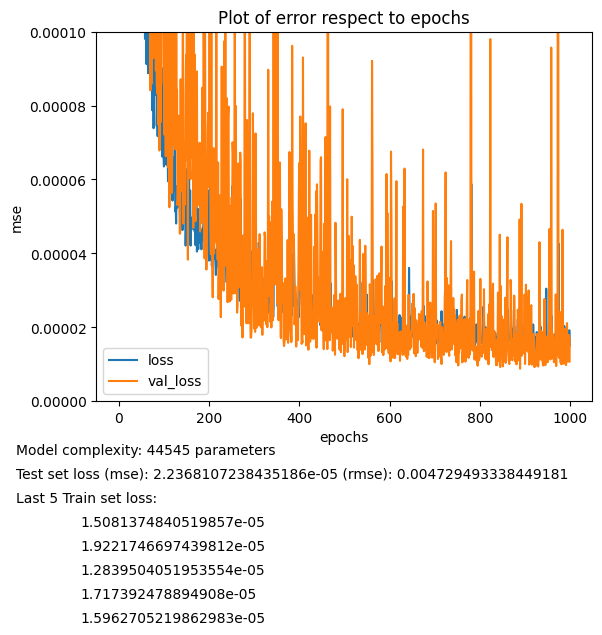

In [35]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-4])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [21]:
emp_test = np.array([-2.9219,3.009,4.4996,45])
emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [22]:
model.predict(emp_test)

array([[3.287858]], dtype=float32)

# Scatter plot

In [36]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [37]:
pred = predictions(X_test)

In [38]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

2.2368092225063422e-05

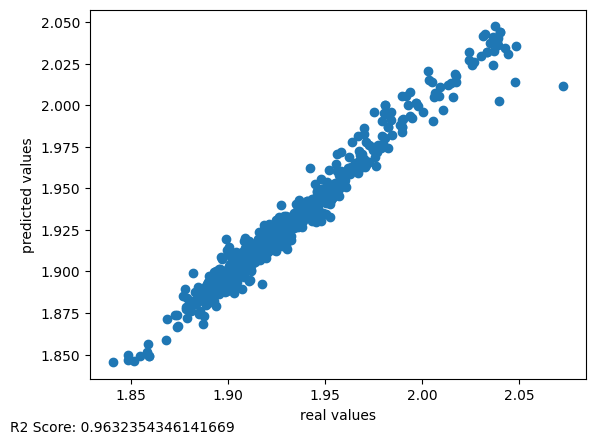

In [39]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [40]:
model.save('2nd_exc_en.h5')

In [29]:
from keras.models import load_model
model2 = load_model('CPL_meV.h5')

In [32]:
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model2.predict(k))) 
    return pred

In [33]:
pred = predictions(X_test)

In [34]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.012320350990509602